In [1]:
work_files_path = "HSE_RiboSeq_HT"

In [2]:
import glob
from collections import namedtuple
work_path_list = sorted(glob.glob(work_files_path+"/*"))
work_path_list

['HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv',
 'HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig',
 'HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig']

In [3]:
tuple_files = namedtuple("Files", ["counts", "track_f", "track_r"])
work_files = tuple_files(*work_path_list)
work_files

Files(counts='HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv', track_f='HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig', track_r='HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig')

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple, Union

sns.set_theme()
sns.set_context("talk")

In [5]:
counts = pd.read_csv(work_files.counts, sep='\t', index_col=0)
counts.head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,NaN
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0


In [6]:
gene_id = "geneID"
gene_symbols = counts["geneSymbol"].to_dict()

In [7]:
counts = counts.drop("geneSymbol", axis=1).fillna(0)
counts.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0


### 1.1 (1 балл). Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.

In [8]:
rna, rpf = "RNA", "RPF"

In [9]:
# Спирмена - так как ненормированные данные среди пациентов и не будет нормального распределения

cols_experiment = counts.columns.str.split("-").str[-1]
tmp = counts.apply(
    lambda row: spearmanr(
        row[cols_experiment == rna], 
        row[cols_experiment == rpf],
        nan_policy="propagate",
    ), 
    axis=1,
)


corr_col, p_value_col = "correlation", "p-value"
corr_df = pd.concat([pd.DataFrame({}, index=counts.index), tmp.str[0], tmp.str[1]], axis=1).rename(columns={
    0: corr_col,
    1: p_value_col,
}).dropna()

corr_df.sort_values(by=p_value_col)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,correlation,p-value
geneID,,
ENSG00000251258.1,1.0,0.0
ENSG00000215274.5,1.0,0.0
ENSG00000156575.2,1.0,0.0
ENSG00000124935.3,1.0,0.0
ENSG00000178690.2,1.0,0.0
...,...,...
ENSG00000198353.7,0.0,1.0
ENSG00000139675.11,0.0,1.0
ENSG00000111537.4,0.0,1.0


### 1.2 (1 балл). Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

In [10]:
def new_subplots(rows: int, cols: int, names: List[str], figsize: Tuple[int, int] = (15, 15)) -> Tuple[plt.Figure, Union[plt.Axes, np.ndarray]]:
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    if isinstance(axes, plt.Axes):
        axes.set_title(names[0])
    elif isinstance(axes, np.ndarray):
        for ax, name in zip(axes.flatten(), names):
            ax.set_title(name)
    else:
        raise ValueError(f"Can't use this type of axes: {type(axes)}")
    return fig, axes
    

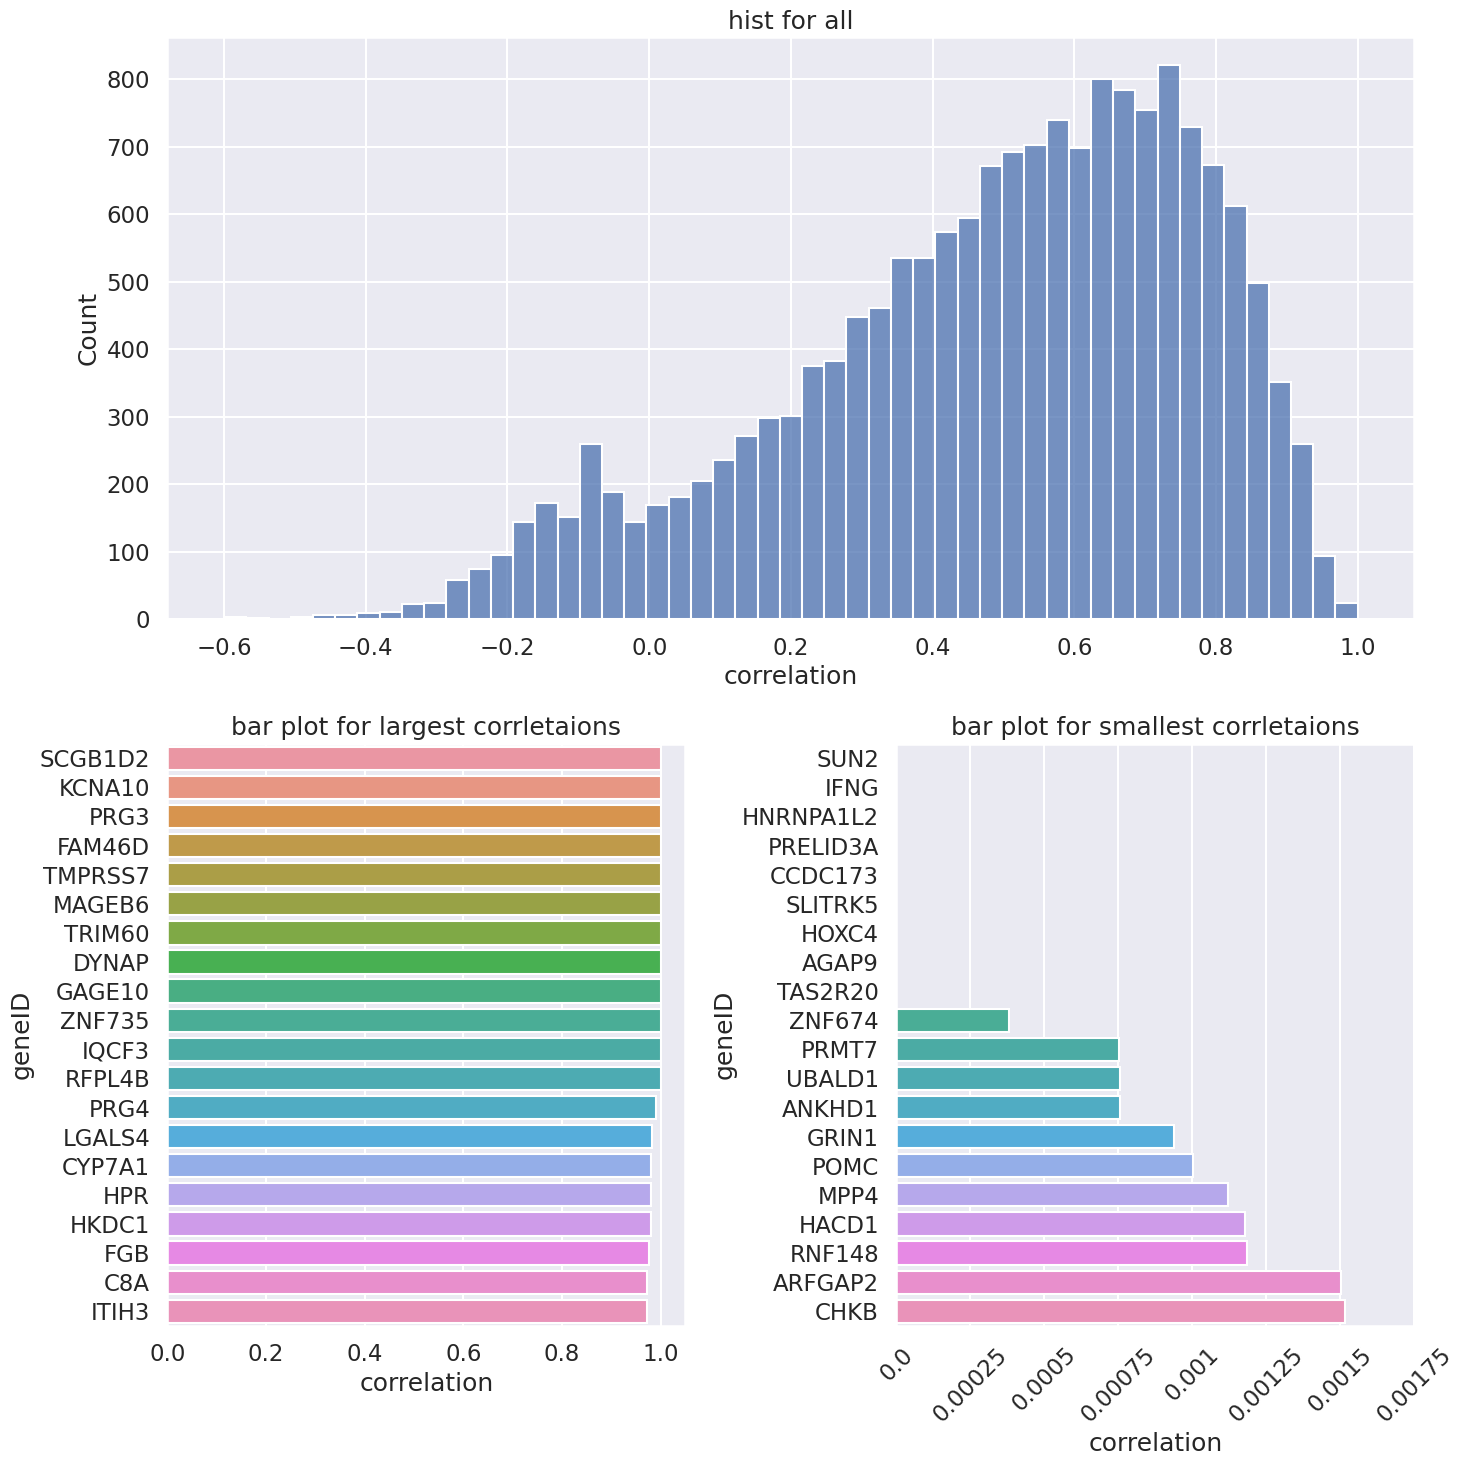

In [11]:
fig, axes = new_subplots(2, 2, names=["", "", 
        "bar plot for largest corrletaions", 
        "bar plot for smallest corrletaions",
    ])

n = 20

gs = axes[0, 0].get_gridspec()
for ax in axes[0, :]:
    ax.remove()

axbig = fig.add_subplot(gs[0, :])
axbig.set_title("hist for all")
sns.histplot(data=corr_df, x=corr_col, ax=axbig)


largest = pd.DataFrame(corr_df[corr_col].abs().nlargest(n))
sns.barplot(
    data=largest, 
    x=corr_col, 
    y=largest.index.map(gene_symbols.get), 
    ax=axes[1, 0]
)

smallest = pd.DataFrame(corr_df[corr_col].abs().nsmallest(n))
sns.barplot(
    data=smallest, 
    x=corr_col,
    y=smallest.index.map(gene_symbols.get),
    ax=axes[1, 1],
)

axes[1, 1].set_xticks(axes[1, 1].get_xticks())
axes[1, 1].set_xticklabels(axes[1, 1].get_xticks(), rotation=45)

plt.tight_layout()
plt.show()

гены с корреляцией близкой к 1 - никакие посттранскрипционные механизмы не подавляют трансляцию с мРНК гена

гены с корреляцией близкой к 0 - посттранскрипционные механизмы подавляют трансляцию с мРНК гена

### 1.3 (1 балл). Проанализируйте распределение каунтов Ribo-seq: постройте зависимость дисперсии от среднего. Похоже ли это на NB-распределение? Если нет, то на какое похоже? Если да, то какие статистические тесты можно использовать для подтверждения того, что перед вами NB-распределение?

In [12]:
df_rpf = counts.loc[:, cols_experiment == rpf].copy()
df_rpf.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61


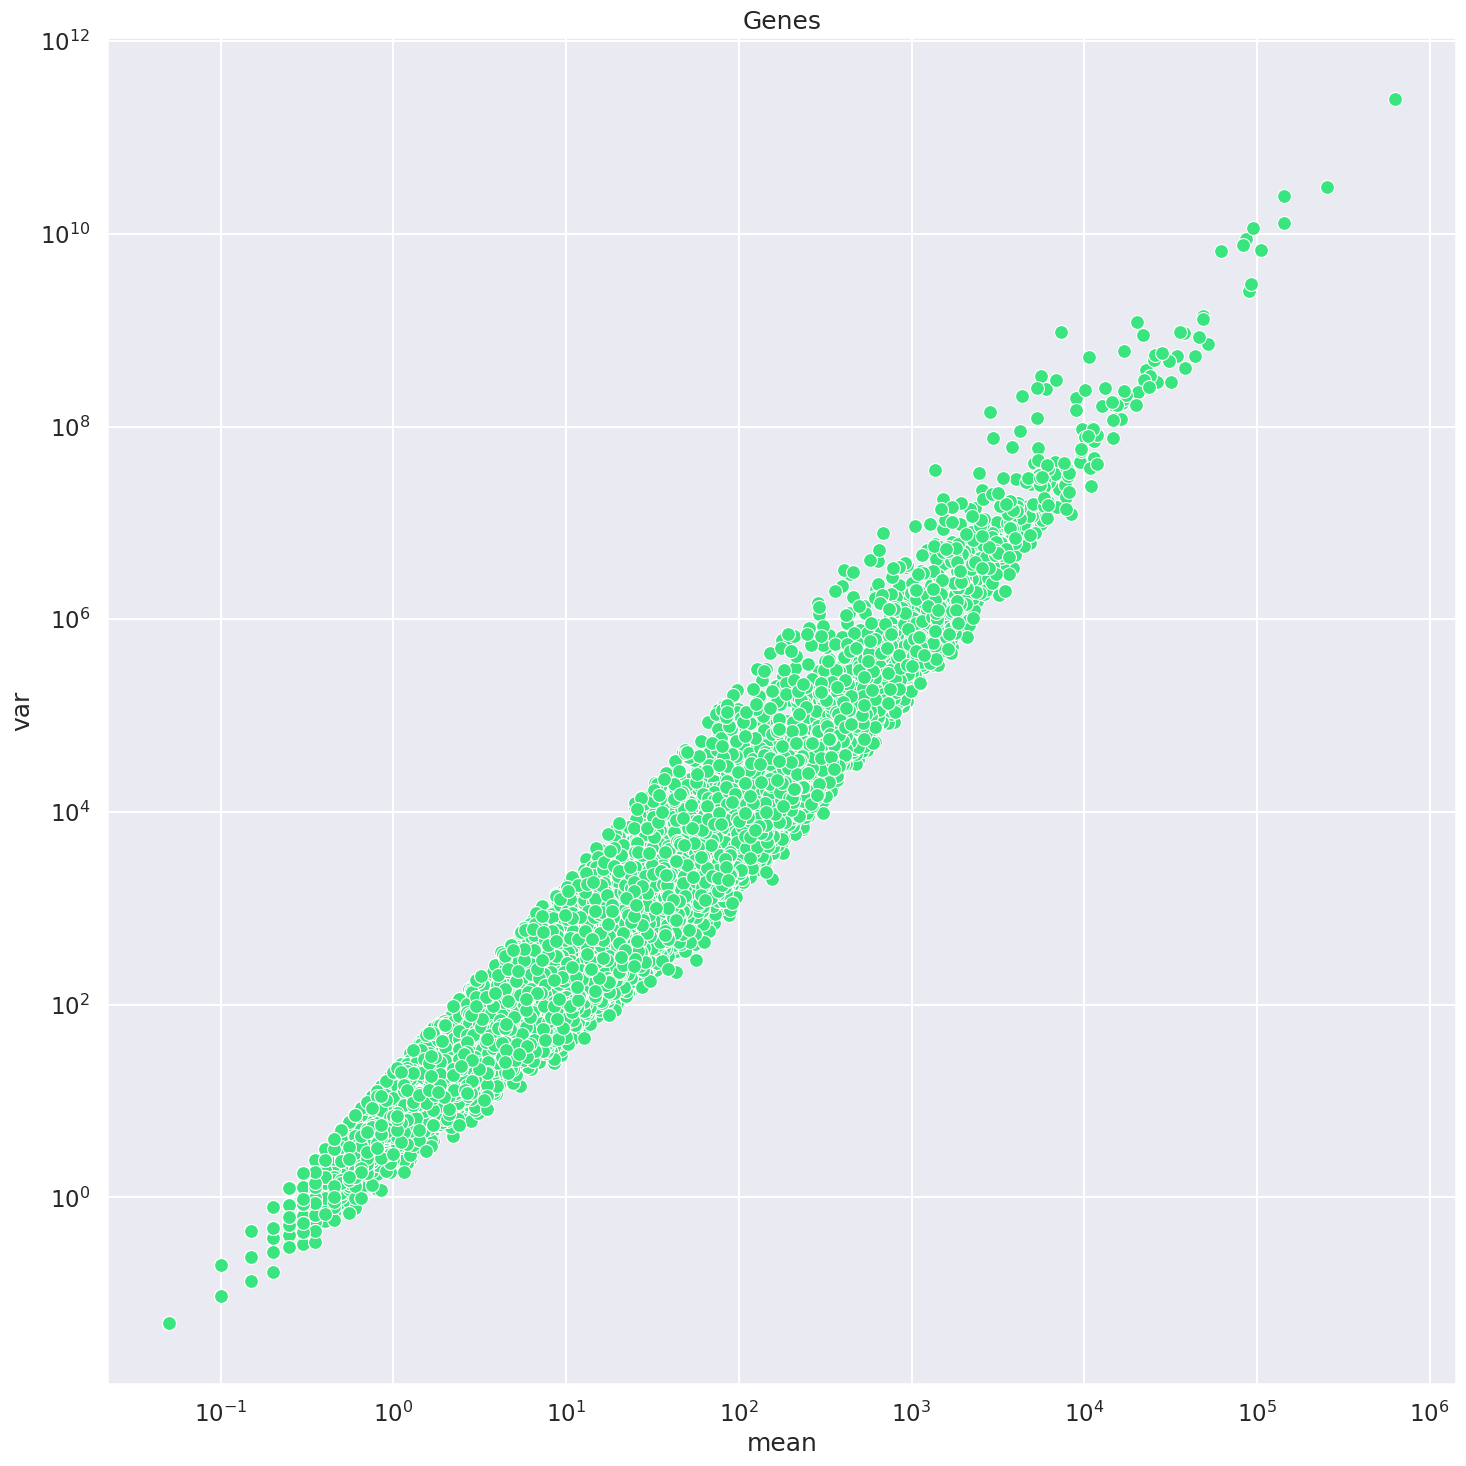

In [13]:
mean_rpf = df_rpf.mean(axis=1)
mean_rpf.name = "mean"

var_rpf = df_rpf.var(axis=1)
var_rpf.name = "var"

fig, ax = new_subplots(1, 1, names=["Genes", "Reference"])

scatterplot_args = dict(color=sns.xkcd_rgb['weird green'], s=100)

sns.scatterplot(x=mean_rpf, y=var_rpf, 
            ax=ax, **scatterplot_args)

ax.set_xscale("log")
ax.set_yscale("log")

plt.tight_layout()
plt.show()

Для всех генов дисперсия больше среднего => можем заключить, что это может быть отрицательное биномиальное распределение, так как:
$$\overbrace{\frac{n(1-p)}{p^2}}^{var} >= \overbrace{\frac{n(1-p)}{p}}^{mean} , p \in [0, 1], n > 0 $$

для того, чтобы это подтвердить, можно попробовать воспользоваться критерием Манна-Уитни

In [14]:
from scipy.stats import nbinom, mannwhitneyu

In [15]:
def count_nbinom_coefs(x: pd.Series, named_tuple=namedtuple("NB_coefs", ["n", "p"])):
    m, v = x.mean(), x.var()
    if v == 0 or m == 0:
        return np.nan, np.nan
    p = m/v
    n = p*(m+v*p) / (2*(1 - p))
    if n <= 0 or p > 1 or p < 0:
        return np.nan, np.nan
    return named_tuple(n, p)

In [16]:
nbinom_coefs = df_rpf.apply(count_nbinom_coefs, axis=1)
mw_pvalues = df_rpf.apply(lambda row: mannwhitneyu(row, nbinom.rvs(coef.n, coef.p, size=20)).pvalue if np.nan not in (coef := nbinom_coefs.loc[row.name]) else np.nan, axis=1)
print(f"По нулевой гипотезе теста Манна-Уитни мы можем принять, что у {mw_pvalues[(~mw_pvalues.isna()) & (mw_pvalues > 0.05)].shape[0]} генов из {mw_pvalues[~mw_pvalues.isna()].shape[0]} каунты между экспериментами распределены отрицательно биномиально")
print("мы исключаем гены, где для каунтов нельзя посчитать NB коэффиценты (см. функцию count_nbinom_coefs)")

По нулевой гипотезе теста Манна-Уитни мы можем принять, что у 16671 генов из 16947 каунты между экспериментами распределены отрицательно биномиально
мы исключаем гены, где для каунтов нельзя посчитать NB коэффиценты (см. функцию count_nbinom_coefs)


### 1.4 (3 балла). Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2 или edgeR (для DESeq есть обёртка на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? Проведите похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition). Что вы скажете о наборе генов, который вы получили этим методом? Выводы подкрепите графиками.

In [17]:
from rpy2.robjects.packages import importr
from rpy2.robjects import default_converter, Formula, pandas2ri
from rpy2.robjects.conversion import localconverter, rpy2py

from rpy2.robjects.methods import RS4

pandas2ri.activate()

base = importr("base")
DESeq2 = importr("DESeq2")

In [18]:
def r_to_df(r_df: RS4) -> pd.DataFrame:
    '''
    Почему-то не отрабатывает pandas2ri.activate() из r в py
    без этой функции base.as_data_frame возвращает np.ndarray
    '''
    with localconverter(default_converter + pandas2ri.converter):
        return rpy2py(base.as_data_frame(r_df))

    
def deseq(counts: pd.DataFrame, meta: pd.DataFrame, formula: str, ref: str = None, exp: str = None, result: str = None) -> pd.DataFrame:
    dds = DESeq2.DESeqDataSetFromMatrix(
        countData=counts, colData=meta, design=Formula(f"~ {formula}"))
    dds = DESeq2.DESeq(dds)
    
    if result is None:
        result = f"{formula}_{exp}_vs_{ref}"
    
    res = DESeq2.results(dds, name=result)
#     res = DESeq2.lfcShrink(dds, coef=result, type="apeglm")
    return r_to_df(res)

In [19]:
def deseq_1_to_1(counts: pd.DataFrame, exp_type: str, cols_experiment: pd.Index = None) -> pd.DataFrame:
    if cols_experiment is None:
        cols_experiment = counts.columns.str.split("-").str[-1]

    formula = "Experiment"
    cols = counts.columns[cols_experiment == exp_type]
    meta = pd.DataFrame({formula: cols.str.split("-").str[1]}, index=cols)

    return deseq(
        counts=counts.loc[:, cols_experiment == exp_type],
        meta=meta, ref="normal", exp="tumor", formula=formula,
    )

In [20]:
diff_expr_RNA = deseq_1_to_1(counts=counts, exp_type=rna, cols_experiment=cols_experiment)
diff_expr_RPF = deseq_1_to_1(counts=counts, exp_type=rpf, cols_experiment=cols_experiment)

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 888 genes
-- DESeq argument 'minRepl

In [21]:
diff_expr_RNA.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.14,406.279268,1.016935,0.396326,2.565906,0.010291,0.038159
ENSG00000000005.5,0.255801,-0.756176,3.025600,-0.249926,0.802645,NaN
ENSG00000000419.12,105.871975,0.636650,0.319406,1.993232,0.046236,0.120018
ENSG00000000457.13,104.480304,0.305490,0.238250,1.282226,0.199763,0.348097
ENSG00000000460.16,62.812560,1.553462,0.547881,2.835400,0.004577,0.020282


In [22]:
diff_expr_RPF.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.14,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000000005.5,0.134227,-0.497105,3.026188,-0.164268,0.869521,NaN
ENSG00000000419.12,187.335949,-0.111414,0.207386,-0.537228,0.591110,0.750365
ENSG00000000457.13,88.779354,0.055055,0.245021,0.224694,0.822217,0.904063
ENSG00000000460.16,42.182053,1.367345,0.481942,2.837153,0.004552,0.030767


In [23]:
meta = pd.DataFrame({
    "condition": counts.columns.str.split("-").str[1],
    "experiment": counts.columns.str.split("-").str[2],
}, index=counts.columns)

diff_TE = deseq(counts=counts, 
                meta=meta,
                formula="condition + experiment + experiment:condition", 
                result="conditiontumor.experimentRPF",
               )

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [24]:
diff_TE.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.14,157.314698,-1.708536,1.071524,-1.594493,0.110826,0.609760
ENSG00000000005.5,0.185139,0.305798,5.912838,0.051718,0.958754,NaN
ENSG00000000419.12,157.609670,-0.664381,0.348364,-1.907145,0.056502,0.489304
ENSG00000000457.13,96.555209,-0.180154,0.316026,-0.570059,0.568638,0.915436
ENSG00000000460.16,50.909678,-0.088034,0.736560,-0.119521,0.904863,0.985700


In [25]:
def volcano_plot(diff_expr: pd.DataFrame, ax: plt.Axes):
    p_tr = 0.05
    diff_expr = diff_expr.dropna()
    xlim = diff_expr.log2FoldChange.abs().max() + 0.5

    sns.scatterplot(
        x=diff_expr.log2FoldChange,
        y=-np.log10(diff_expr.padj),
        ax=ax,
        s=3,
        linewidth=0,
    )

    ax.plot(
        [-xlim, xlim],
        [-np.log10(p_tr), -np.log10(p_tr)],
        color="red",
    )

    sns.scatterplot(
        x=diff_expr[diff_expr.padj < p_tr].log2FoldChange,
        y=-np.log10(diff_expr[diff_expr.padj < p_tr].padj),
        ax=ax,
        s=5,
        linewidth=0,
        color="red",
    )

    ax.grid(alpha=0.3)

    ax.set_xlim(-xlim, xlim)
    ax.set_xlabel("log$_2$FoldChange")
    ax.set_ylabel("log$_{10}$FDR")

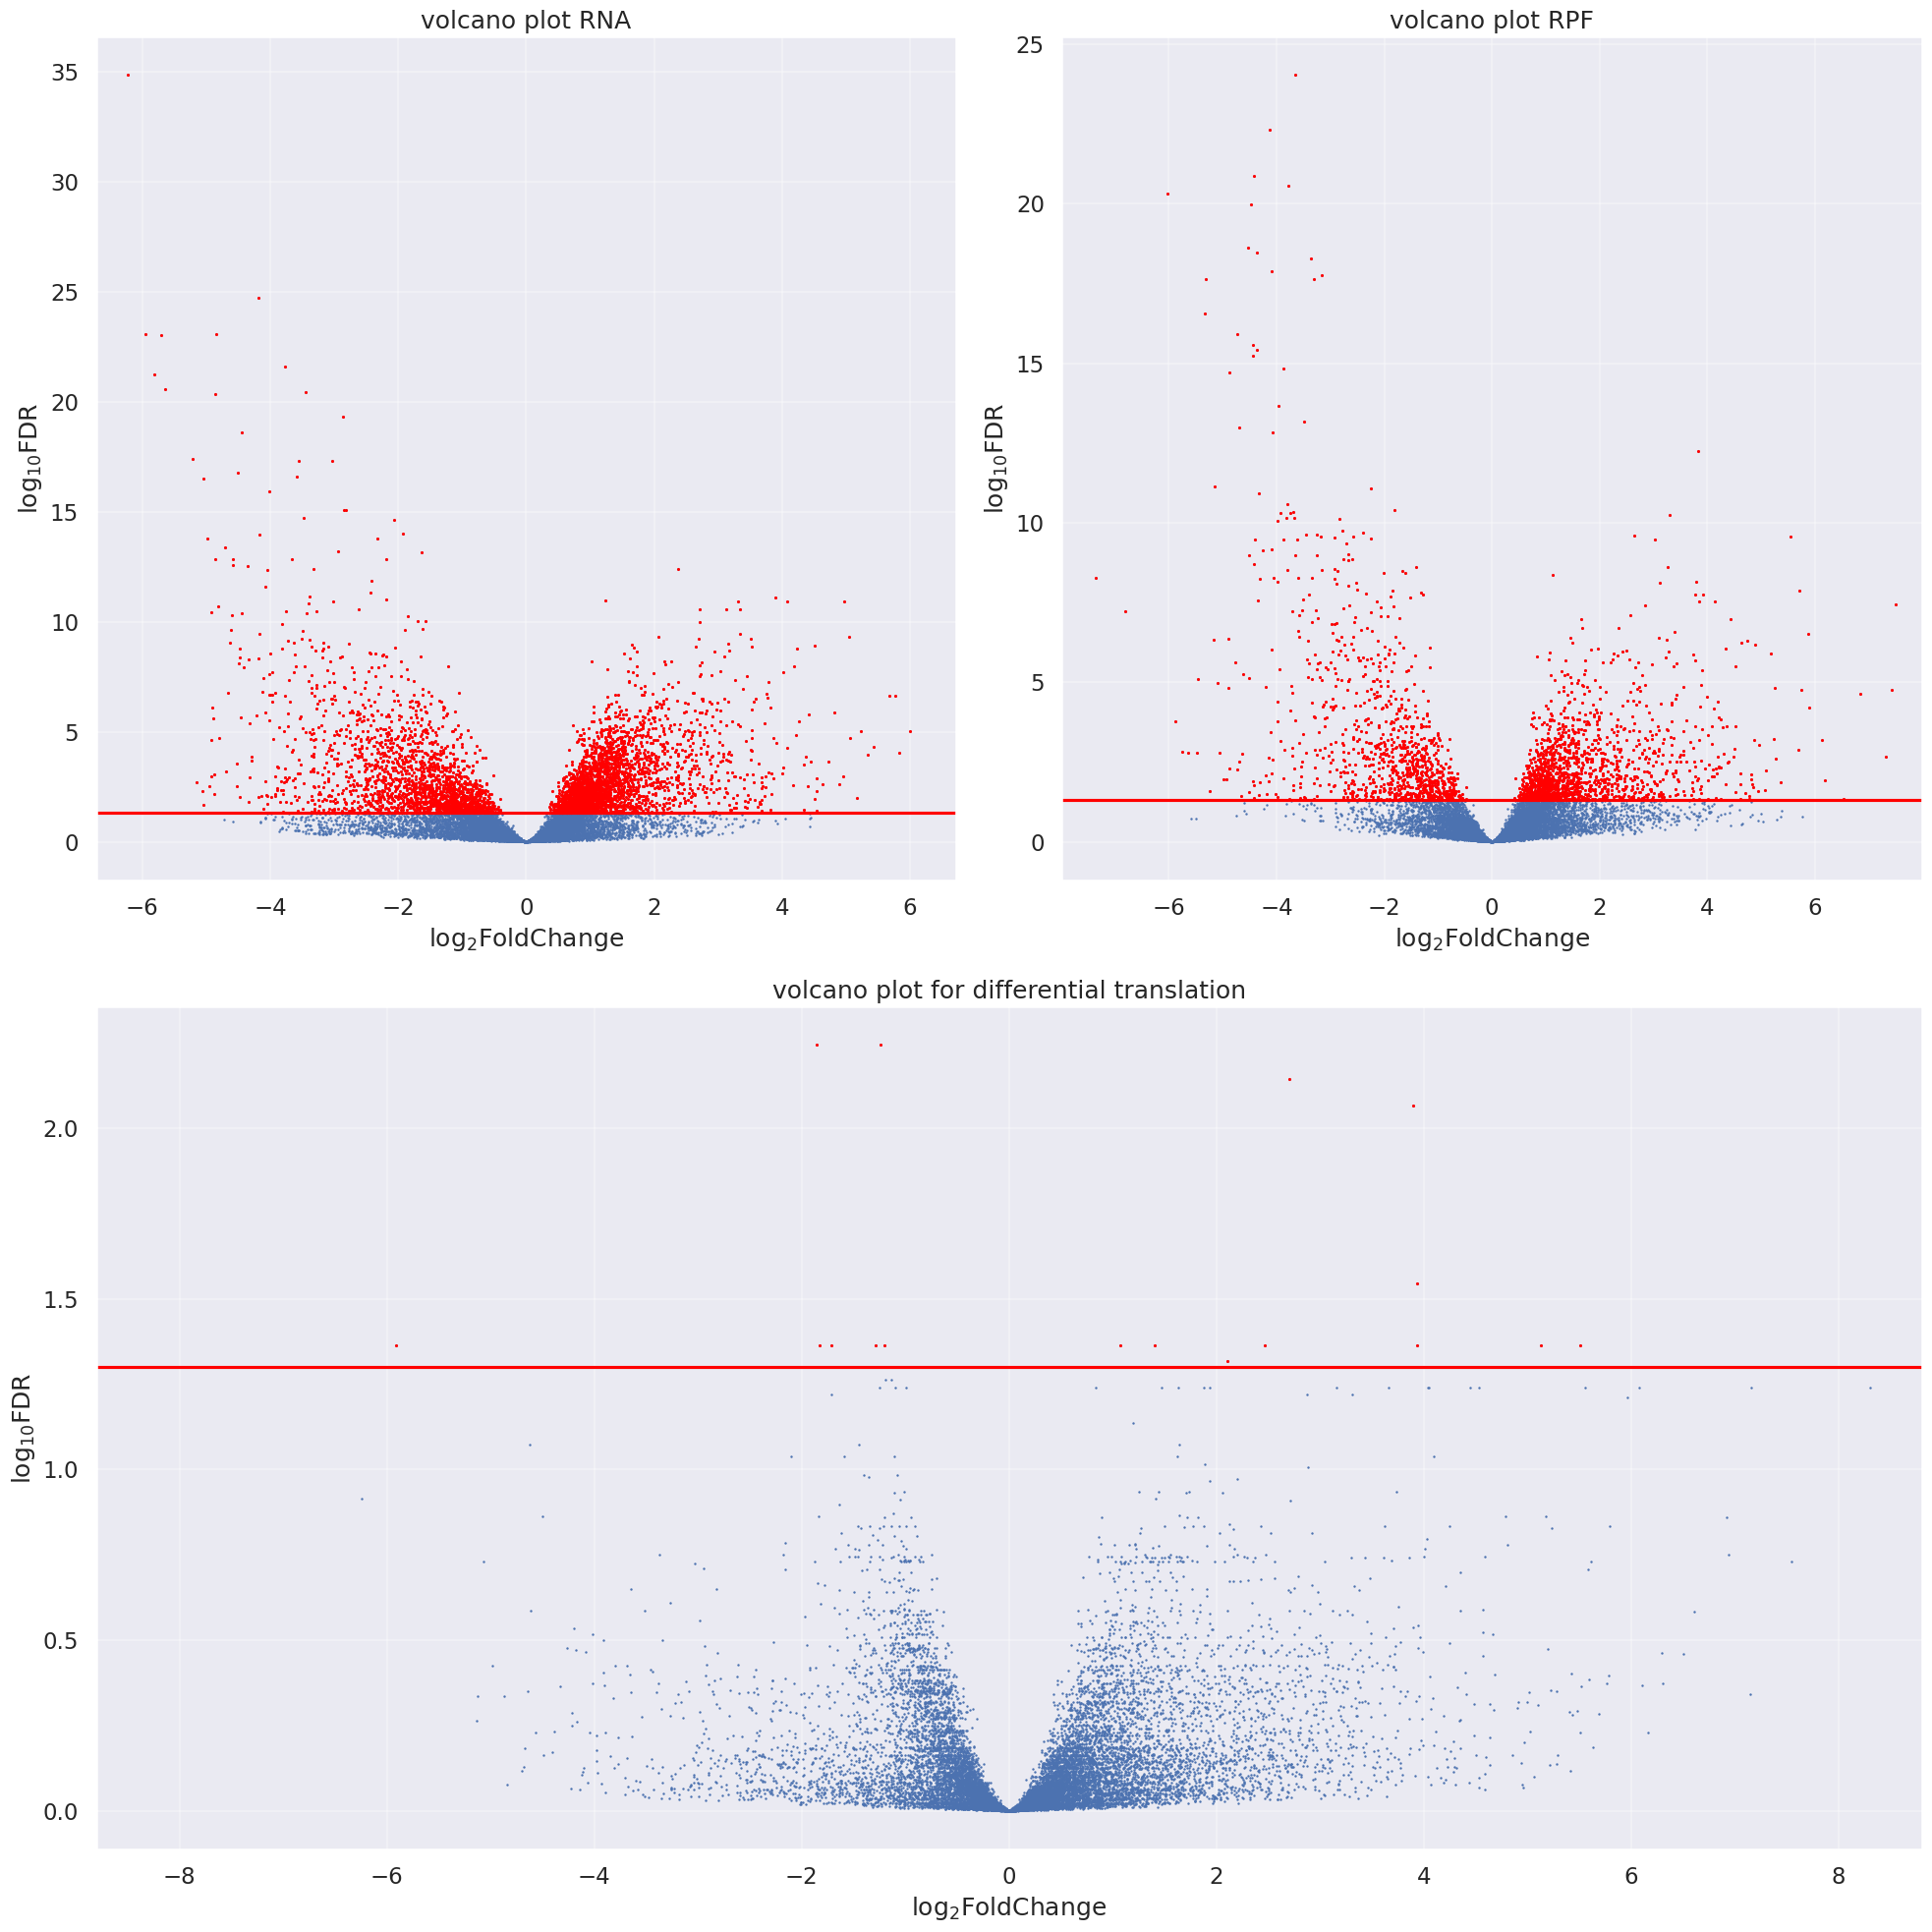

In [26]:
fig, axes = new_subplots(2, 2, names=["volcano plot RNA", "volcano plot RPF"], figsize=(20, 20))

gs = axes[0, 1].get_gridspec()
for ax in axes[1, :]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :])
axbig.set_title("volcano plot for differential translation")

volcano_plot(diff_expr=diff_expr_RNA, ax=axes[0, 0])
volcano_plot(diff_expr=diff_expr_RPF, ax=axes[0, 1])
volcano_plot(diff_expr=diff_TE, ax=axbig)
plt.tight_layout()
plt.show()

# 2.1 (2 балла). Присутствует ли в покрытии генома неравномерность? Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? Присутствует ли там периодичность в три нуклеотида? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? Выводы проиллюстрируйте графиками.

In [27]:
def read_wig(path):
    return pd.read_csv(path, sep='\t').reset_index().rename(columns={
        "index":"start",
        "variableStep chrom=U00096.3": "counts",
    })

In [30]:
f_coords = read_wig(work_files.track_f)
f_coords.head()

,start,counts
0,40,1
1,77,2
2,85,1
3,139,1
4,147,1


In [31]:
r_coords = read_wig(work_files.track_r)
r_coords.head()

,start,counts
0,585,1
1,1212,1
2,1292,1
3,3626,1
4,3979,1


# 2.2 (1 балл). Рассчитайте значения RPKM и TPM для каждого гена. В чём разница между RPKM и TPM?

# 2.3 (1 балл). Проанализируйте значения RPKM для генов из оперона ATP. Укажите геномные координаты оперона, а также то, какие гены в него входят. Есть ли разница между RPKM у различных генов, присутствующих в опероне? Как вы можете объяснить эту разницу с биологической точки зрения? Как вы думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?